In [4]:
import pandas as pd 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.shape

(299, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

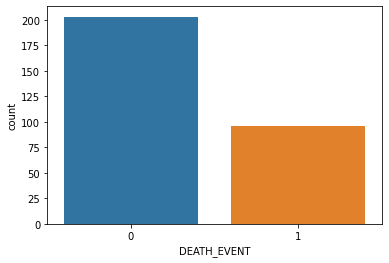

In [13]:
sns.countplot(x = 'DEATH_EVENT', data = df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

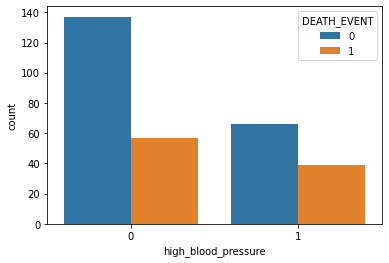

In [14]:
sns.countplot(x ='high_blood_pressure', data = df, hue= 'DEATH_EVENT')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

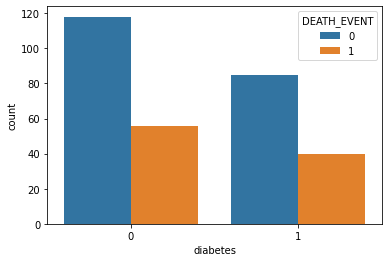

In [15]:
sns.countplot(x= 'diabetes', data = df, hue= 'DEATH_EVENT')

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('DEATH_EVENT',axis=1), df[['DEATH_EVENT']],train_size= .75,random_state=40)

In [19]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256
285,55.0,1,170,1,40,0,336000.00,1.2,135,1,0,250
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
227,55.0,1,2794,0,35,1,141000.00,1.0,140,1,0,206
263,68.0,1,157,1,60,0,208000.00,1.0,140,0,0,237


In [20]:
ytrain.head()

,DEATH_EVENT
288,0
285,0
0,1
227,0
263,0


In [22]:
xtrain.shape

(224, 12)

In [23]:
xtest.shape

(75, 12)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [26]:
df = clf.fit(xtrain,ytrain)

In [27]:
pred = clf.predict(xtrain)
pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [28]:
ytrain.head()

,DEATH_EVENT
288,0
285,0
0,1
227,0
263,0


In [32]:
ytrain['pred'] = pred
ytrain.head(20)

,DEATH_EVENT,pred
288,0,0
285,0,0
0,1,1
227,0,0
263,0,0
209,0,0
35,1,1
262,1,1
62,0,0
265,0,0


In [33]:
ytrain['pred'] = pred
ytrain.tail(20)

,DEATH_EVENT,pred
202,0,0
186,1,1
104,0,0
270,0,0
207,0,0
158,0,0
8,1,1
181,1,1
224,0,0
73,0,0


In [37]:
df.score(xtrain,ytrain['DEATH_EVENT'])

1.0

In [39]:
df.score(xtest,ytest)

0.8

# confusion matrix

In [54]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,plot_roc_curve

In [41]:
ytest.head()

,DEATH_EVENT
43,0
228,0
18,1
183,1
135,0


In [42]:
accuracy_score(ytest, clf.predict(xtest))

0.8

In [43]:
clf.predict(xtest)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [44]:
cm = confusion_matrix(ytest,clf.predict(xtest))

In [45]:
cm

array([[39,  9],
       [ 6, 21]], dtype=int64)

In [46]:
precision_score(ytest,clf.predict(xtest))

0.7

In [47]:
recall_score(ytest,clf.predict(xtest))

0.7777777777777778

In [48]:
f1_score(ytest,clf.predict(xtest))

0.7368421052631577

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


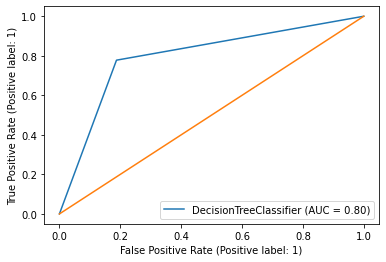

In [56]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

<AxesSubplot:>

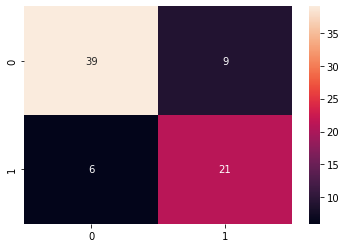

In [57]:
sns.heatmap(cm, annot = True)